In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics as mt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingRegressor

In [2]:
df = pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


###### Data exploration

In [3]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [7]:
df.shape

(14204, 12)

In [8]:
df.ndim

2

###### Missing value treatment

In [9]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i].fillna(st.mode(df[i]), inplace = True)
    if df[i].dtype != 'object':
        df[i].fillna(np.mean(df[i]), inplace = True)

In [10]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.380000
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2181.288914
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2181.288914
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,2181.288914
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,2181.288914


###### how does 

###### How does item weight relate to item MRP?

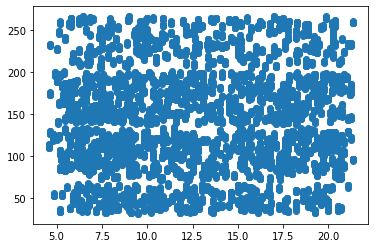

In [12]:
plt.scatter(x = 'Item_Weight', y = 'Item_MRP', data = df)

###### How does item outlet sales relate to item mrp?

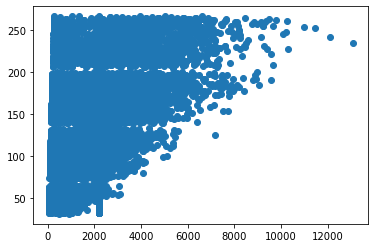

In [13]:
plt.scatter(x = 'Item_Outlet_Sales', y = 'Item_MRP', data = df)

###### histogram of MRP

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

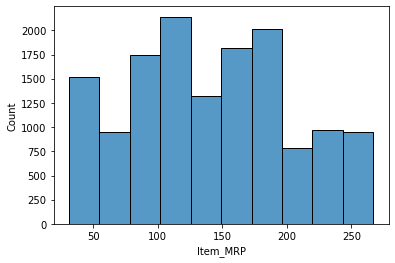

In [14]:
sns.histplot(df['Item_MRP'], bins = 10)

###### Histogram of item wieght

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

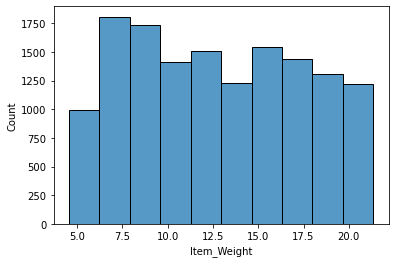

In [15]:
sns.histplot(df['Item_Weight'], bins = 10)

In [16]:
def catdet(col):
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Most recurring value in {col} is {st.mode(df[col])}")
    print(f"Number of missing values in {col} are {df[col].isnull().sum()}")
    
    percentage = df[col].value_counts()
    label = list(df[col].value_counts().index)

    fig, ax = plt.subplots(1, 2, figsize = (15, 10))
    
    sns.countplot(x = df[col], ax = ax[0])
    ax[0].set_title(f'count of {col}')
    
    plt.pie(percentage, labels = label, autopct = '%.2f%%')
    ax[1].set_title(f'share of {col}')

def condet(col):
    print(f"Mean of {col} is {df[col].mean()}")
    print(f"Median of the {col} is {df[col].median()}")
    print(f"Mode of the {col} is {st.mean(df[col])}")
    print(f"Standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in {col} are {df[col].isnull().sum()}")
    
    fig, ax = plt.subplots(1, 2, figsize = (15, 10))
    
    sns.boxplot(x = df[col], ax = ax[0], color = 'brown')
    ax[0].set_title(f'count of {col}')
    
    sns.histplot(x = df[col],bins = 10, color = 'green')
    ax[1].set_title(f'share of {col}')
    
def catcont(col1, col2):
    label = list(df[col1].value_counts().index)
    percentage = df[col1].value_counts()
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    sns.countplot(x = df[col1], hue = df[col2], ax = ax[0])
    
    plt.pie(percentage, labels = label, autopct = '%.2f%%')

Unique values in Outlet_Size are: ['Medium' 'High' 'Small']
Most recurring value in Outlet_Size is Small
Number of missing values in Outlet_Size are 0


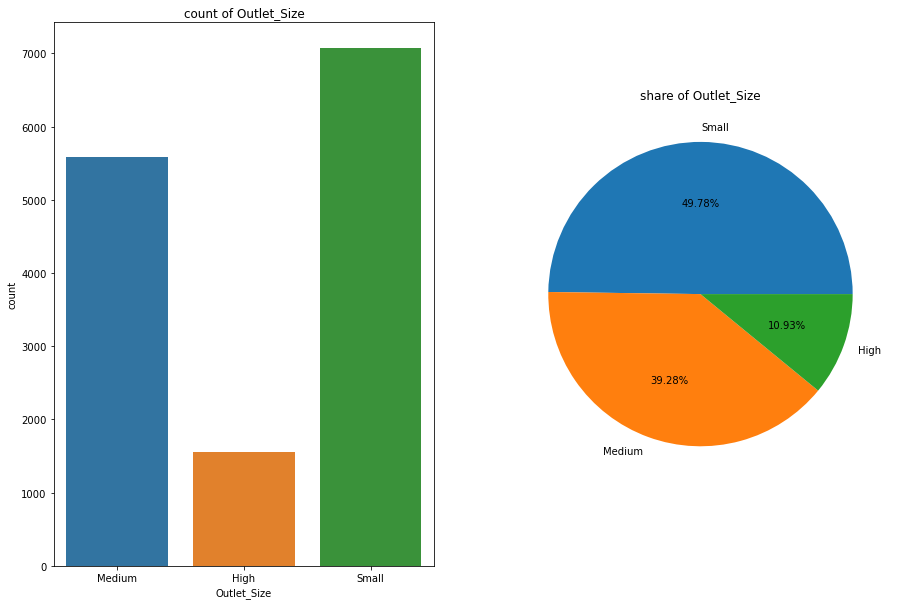

In [17]:
catdet('Outlet_Size')

Unique values in Outlet_Location_Type are: ['Tier 1' 'Tier 3' 'Tier 2']
Most recurring value in Outlet_Location_Type is Tier 3
Number of missing values in Outlet_Location_Type are 0


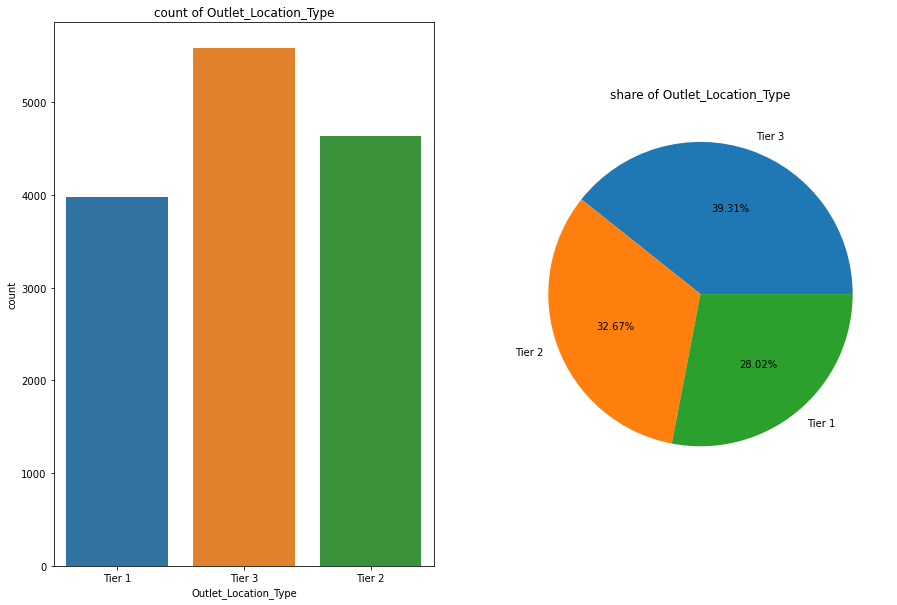

In [18]:
catdet('Outlet_Location_Type')

Unique values in Item_Fat_Content are: ['Low Fat' 'Regular']
Most recurring value in Item_Fat_Content is Low Fat
Number of missing values in Item_Fat_Content are 0


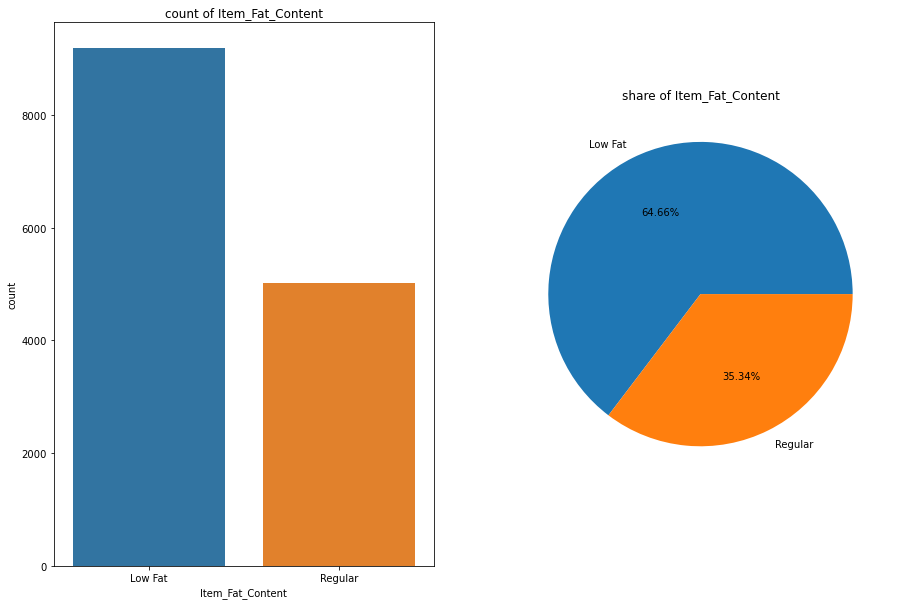

In [19]:
catdet('Item_Fat_Content')

Unique values in Outlet_Type are: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Most recurring value in Outlet_Type is Supermarket Type1
Number of missing values in Outlet_Type are 0


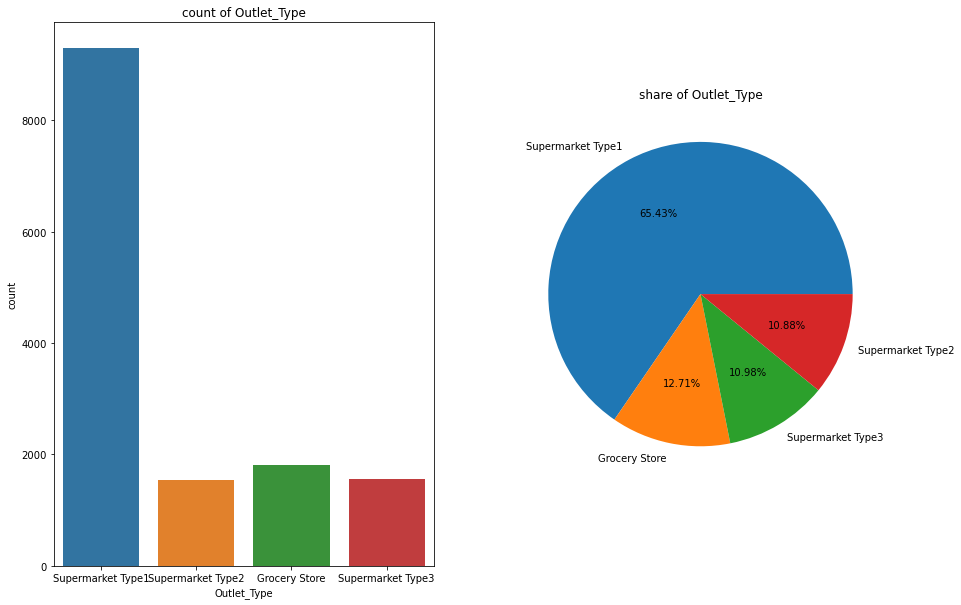

In [20]:
catdet('Outlet_Type')

Mean of Item_MRP is 141.00497725992656
Median of the Item_MRP is 142.247
Mode of the Item_MRP is 141.0049772599268
Standard deviation of the Item_MRP is 62.086938014763994
Number of missing values in Item_MRP are 0


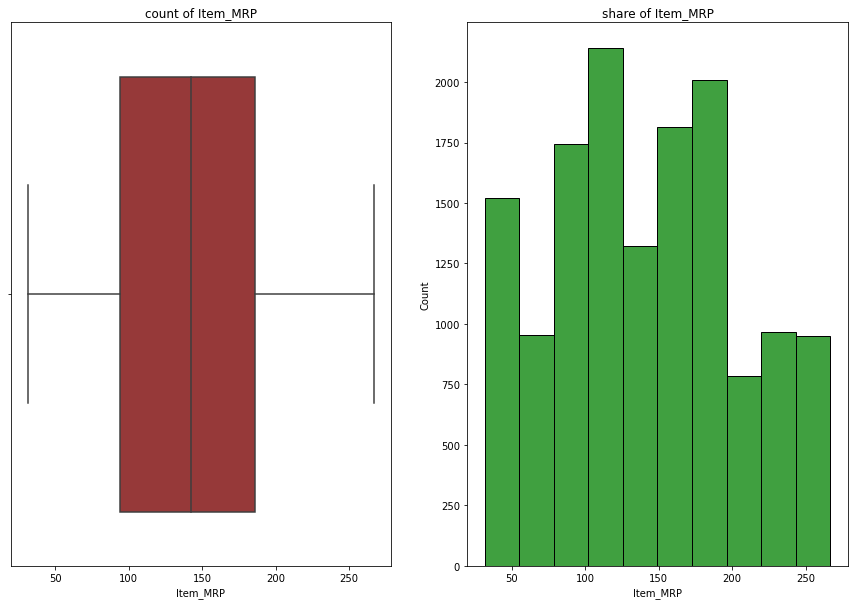

In [21]:
condet('Item_MRP')

Mean of Item_Outlet_Sales is 2181.28891357465
Median of the Item_Outlet_Sales is 2181.2889135750365
Mode of the Item_Outlet_Sales is 2181.288913575034
Standard deviation of the Item_Outlet_Sales is 1321.8644296999018
Number of missing values in Item_Outlet_Sales are 0


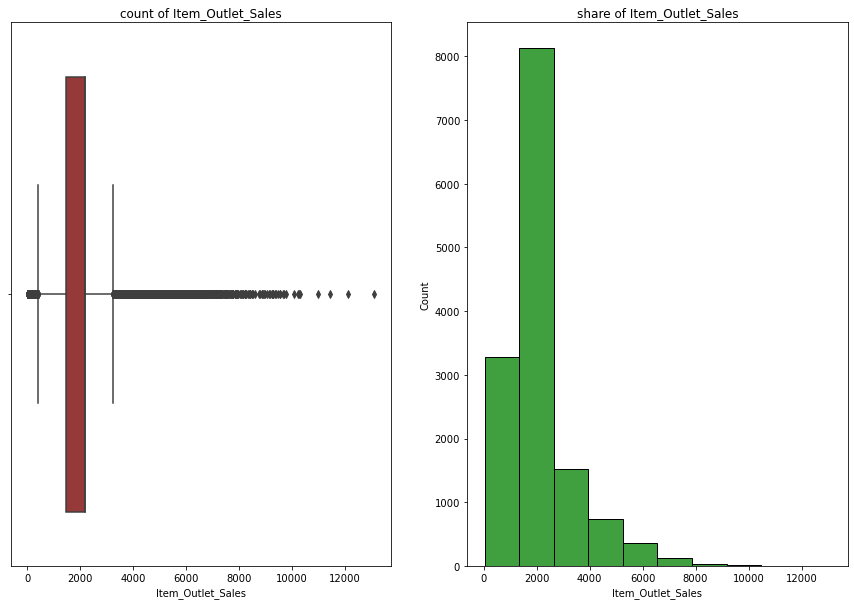

In [22]:
condet('Item_Outlet_Sales')

Mean of Item_Weight is 12.793380385807628
Median of the Item_Weight is 12.6
Mode of the Item_Weight is 12.793380385806815
Standard deviation of the Item_Weight is 4.6517158036609825
Number of missing values in Item_Weight are 0


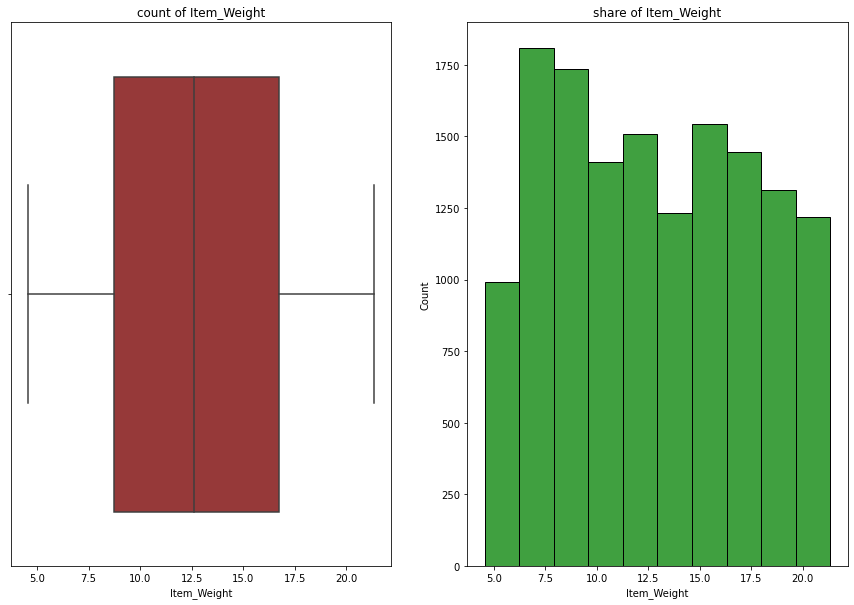

In [23]:
condet('Item_Weight')

Mean of Item_Visibility is 0.07030079341671354
Median of the Item_Visibility is 0.062347052
Mode of the Item_Visibility is 0.07030079341671361
Standard deviation of the Item_Visibility is 0.048621198376929964
Number of missing values in Item_Visibility are 0


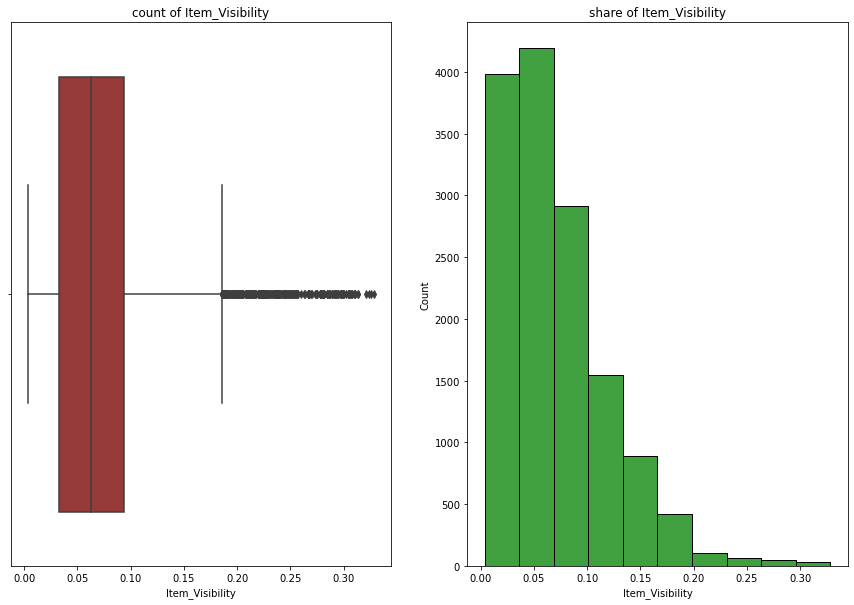

In [24]:
condet('Item_Visibility')

In [25]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [26]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<BarContainer object of 14204 artists>

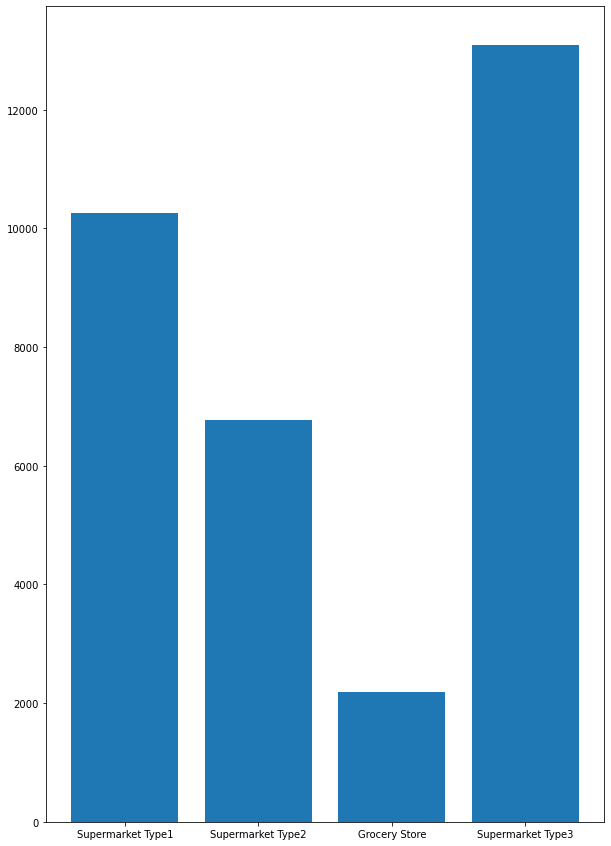

In [27]:
plt.figure(figsize=(10, 15))
plt.bar(df['Outlet_Type'], df['Item_Outlet_Sales'])

<BarContainer object of 14204 artists>

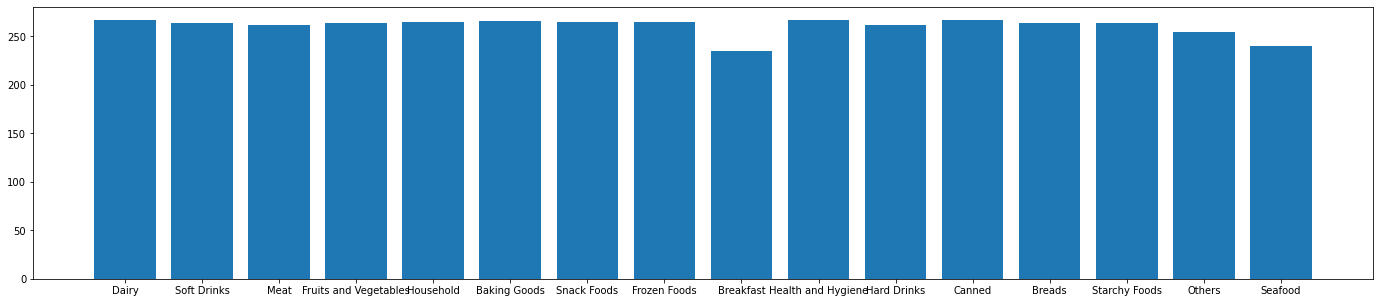

In [28]:
plt.figure(figsize=(24, 5))
plt.bar(df['Item_Type'], df['Item_MRP'])

###### encoding and standardizing the data

In [29]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])

In [30]:
for i in df.columns:
    df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns = df.columns)

In [31]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.149551,0.353974,1.0,0.030546,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333,0.164551
14200,0.197689,0.181304,1.0,0.429216,1.000000,0.585126,0.333333,1.000000,0.5,1.0,0.666667,0.164551
14201,0.915276,0.324204,0.0,0.215364,0.533333,0.371199,0.777778,0.708333,1.0,0.5,0.333333,0.164551
14202,0.334403,0.639774,1.0,0.188211,0.200000,0.778154,0.222222,0.916667,1.0,0.5,0.333333,0.164551


In [32]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.050768,-0.111079,-0.040769,-0.012048,0.010743,-0.001089,-0.002954,0.002209,-0.002473,-0.004532,0.002220
Item_Weight,0.050768,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.003002,0.000247,0.000944,-0.001719,0.001913,0.010259
Item_Fat_Content,-0.111079,-0.033737,1.000000,0.048315,-0.147733,-0.004019,-0.001095,0.000137,-0.000827,0.001373,-0.000228,0.014494
Item_Visibility,-0.040769,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.108731,-0.090833,0.026808,-0.020550,-0.172744,-0.105064
Item_Type,-0.012048,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.001126,0.003061,-0.001080,0.002083,0.004305,0.013194
Item_MRP,0.010743,0.035751,-0.004019,-0.009144,0.043948,1.000000,-0.000555,0.000141,-0.001305,0.000838,0.000136,0.440979
Outlet_Identifier,-0.001089,0.003002,-0.001095,-0.108731,0.001126,-0.000555,1.000000,0.079047,0.423623,-0.716151,0.099899,0.125742
Outlet_Establishment_Year,-0.002954,0.000247,0.000137,-0.090833,0.003061,0.000141,0.079047,1.000000,0.428387,-0.089328,-0.122519,-0.038061
Outlet_Size,0.002209,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.423623,0.428387,1.000000,-0.590677,-0.260496,-0.046879
Outlet_Location_Type,-0.002473,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.716151,-0.089328,-0.590677,1.000000,0.467251,0.069224


<AxesSubplot:>

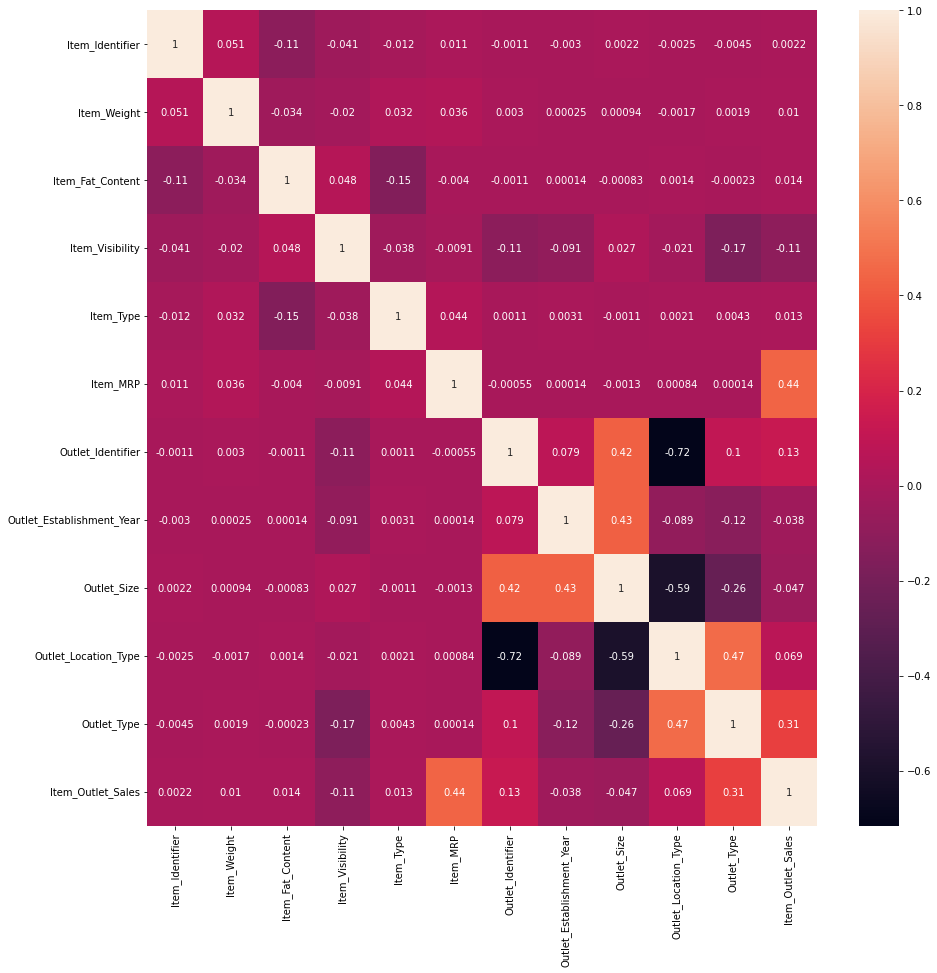

In [33]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True)

###### splitting the data in train and test segments

In [34]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.149551,0.353974,1.0,0.030546,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333,0.164551
14200,0.197689,0.181304,1.0,0.429216,1.000000,0.585126,0.333333,1.000000,0.5,1.0,0.666667,0.164551
14201,0.915276,0.324204,0.0,0.215364,0.533333,0.371199,0.777778,0.708333,1.0,0.5,0.333333,0.164551
14202,0.334403,0.639774,1.0,0.188211,0.200000,0.778154,0.222222,0.916667,1.0,0.5,0.333333,0.164551


In [35]:
x = df.drop(columns = ['Item_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.8, random_state = 1)

###### Linear regression for target variable set as item MRP

In [37]:
lr = LinearRegression()

In [38]:
lrm = lr.fit(xtrain, ytrain)
lrm

LinearRegression()

In [39]:
lrscore = lrm.score(xtrain, ytrain)
print(f"{round(lrscore*100, 2)}%")

30.2%


In [40]:
lrm.intercept_

0.04154798480365081

In [41]:
lrm.coef_

array([-0.00276513,  0.00382537, -0.0278708 , -0.00342041,  0.17128646,
        0.02171408, -0.00477148, -0.00873907,  0.11919303])

In [42]:
ypred = lrm.predict(xtest)

In [43]:
for i, j in zip(ytest, ypred):
    print(i,'was actual and', j, 'was predicted')

0.16455128126640908 was actual and 0.12428428292059036 was predicted
0.11098643272467612 was actual and 0.12770276050375667 was predicted
0.4141079261450576 was actual and 0.24109131218812263 was predicted
0.17713965112720598 was actual and 0.2017315319696223 was predicted
0.16455128126640908 was actual and 0.15014335518591287 was predicted
0.22686932571661736 was actual and 0.22340721840792382 was predicted
0.16455128126640908 was actual and 0.19098448139336582 was predicted
0.16455128126640908 was actual and 0.1570981348002226 was predicted
0.14668978884015096 was actual and 0.175126559657792 was predicted
0.5441701519942875 was actual and 0.3263855090606976 was predicted
0.16455128126640908 was actual and 0.1714703637636995 was predicted
0.16455128126640908 was actual and 0.1945993657515252 was predicted
0.16455128126640908 was actual and 0.1939767331166775 was predicted
0.028307660920126494 was actual and 0.1203053334722408 was predicted
0.16455128126640908 was actual and 0.2149009

In [44]:
MSE = mt.mean_squared_error(ytest, ypred)
MAE = mt.mean_absolute_error(ytest, ypred)
MSE, MAE

(0.006646056790723713, 0.06282573779772403)

In [45]:
crossval = cross_val_score(lrm , xtrain , ytrain , cv = 5 , scoring  = 'r2')
crossval.mean()

0.300670927776563

###### random forest

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
mod = RandomForestRegressor(n_estimators=10,max_depth=3,random_state=1)
mod.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=1)

In [48]:
ypred = mod.predict(xtest)
ypred

array([0.11031259, 0.15405761, 0.21224436, ..., 0.21224436, 0.21224436,
       0.15405761])

In [49]:
scorrf = mod.score(xtest, ytest)
print(f"{round(scorrf*100, 2)}%")

32.16%


In [53]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [54]:
ypred = dtr.predict(xtest)
ypred

array([0.09048251, 0.08665715, 0.16455128, ..., 0.23329593, 0.16455128,
       0.16455128])

In [55]:
stscor = dtr.score(xtest, ytest)
print(f"{round(stscor*100, 2)}%")

-49.16%


In [50]:
def get_stacking():
    level0 = list()
    level0.append(('lr', LinearRegression()))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor())) # ask for help
    level0.append(('svm', SVR()))
    #level0.append(('bayes', GaussianNB()))
    
    level1 = LinearRegression()
    
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    
    return model

mod = get_stacking()
mod.fit(xtrain, ytrain)

StackingRegressor(cv=5,
                  estimators=[('lr', LinearRegression()),
                              ('knn', KNeighborsRegressor()),
                              ('cart', DecisionTreeRegressor()),
                              ('svm', SVR())],
                  final_estimator=LinearRegression())

In [51]:
ypred = mod.predict(xtest)
ypred

array([0.1192885 , 0.13681731, 0.24118966, ..., 0.22465675, 0.26200031,
       0.15236179])

In [52]:
scoren = mod.score(xtest, ytest)
print(f"{round(scoren*100, 2)}%")

33.88%


Linear regression had a score of                          = 30.2%

Ensemble stacking had a score of                          = 33.88%

Random forest had a score of                              = 32.16%

Decision tree regressor had a score of                    = -49.16%